<a href="https://colab.research.google.com/github/tkd8973/Data_Visualization/blob/main/SW/visualization_sw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
from google.colab import files

df = pd.read_excel('KDX2021_SSC_ONLINE_DATA.xlsx')
df2 = df.copy()
df

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
2,201905,골프용품,휴일,일,F.22-02시,M,B.3O대,51
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
4,202005,인테리어,평일,월,C.10-14시,F,D.5O대,1101
...,...,...,...,...,...,...,...,...
21552,201905,패션,평일,월,F.22-02시,M,C.4O대,2470
21553,202005,골프용품,평일,금,D.14-18시,F,C.4O대,107
21554,202105,스포츠의류용품,평일,화,E.18-22시,M,B.3O대,603
21555,202105,인테리어,평일,화,C.10-14시,F,E.60대이상,415


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
exit()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
df2

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
2,201905,골프용품,휴일,일,F.22-02시,M,B.3O대,51
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
4,202005,인테리어,평일,월,C.10-14시,F,D.5O대,1101
...,...,...,...,...,...,...,...,...
21552,201905,패션,평일,월,F.22-02시,M,C.4O대,2470
21553,202005,골프용품,평일,금,D.14-18시,F,C.4O대,107
21554,202105,스포츠의류용품,평일,화,E.18-22시,M,B.3O대,603
21555,202105,인테리어,평일,화,C.10-14시,F,E.60대이상,415


전처리
* column명을 재설정 해준다
* 위험하지만 총합 건수가 1000미만인 행 DROP
* Age : 20-60 으로 mapping 해주고, 20~30대만 사용함으로 추출
* 성별/나이로 새로운 열 생성

In [2]:
df2.columns = ['Year_Month','Tag','weekday','day','time','sex','age','sum']
df2 = df2[df2['sum']>1000]
df2.sort_values(by=['age','time'],inplace=True)
ages = df2.age.unique()

df2['age']=df2['age'].apply(lambda x:[int(((i+1)*10)+10) for i,v in enumerate(ages) if x==v][0])
datas = df2[(df2['age']==20) | (df2['age']==30)]


<ipython-input-2-3399d4dc100e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(by=['age','time'],inplace=True)
<ipython-input-2-3399d4dc100e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age']=df2['age'].apply(lambda x:[int(((i+1)*10)+10) for i,v in enumerate(ages) if x==v][0])


In [3]:
datas

,Year_Month,Tag,weekday,day,time,sex,age,sum
141,202005,패션,평일,목,A.02-06시,F,20,1225
385,202105,패션,평일,금,A.02-06시,F,20,1168
554,202105,패션,평일,목,A.02-06시,F,20,1515
2384,202105,패션,휴일,토,A.02-06시,F,20,1331
3142,202005,패션,휴일,토,A.02-06시,F,20,1236
...,...,...,...,...,...,...,...,...
21346,202005,유아용품,휴일,토,F.22-02시,F,30,2243
21386,202005,인테리어,평일,수,F.22-02시,F,30,2485
21474,202105,유아용품,휴일,수,F.22-02시,F,30,1205
21507,202005,화장품,평일,월,F.22-02시,M,30,1478


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5345 entries, 141 to 21446
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year_Month  5345 non-null   int64 
 1   Tag         5345 non-null   object
 2   weekday     5345 non-null   object
 3   day         5345 non-null   object
 4   time        5345 non-null   object
 5   sex         5345 non-null   object
 6   age         5345 non-null   int64 
 7   sum         5345 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 375.8+ KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [7]:
plt.rc('font', family='NanumBarunGothic') 

* 데이터의 조작 전, 시각화를 통해 의미있는 데이터와 없는 데이터를 골라내어 필터링

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


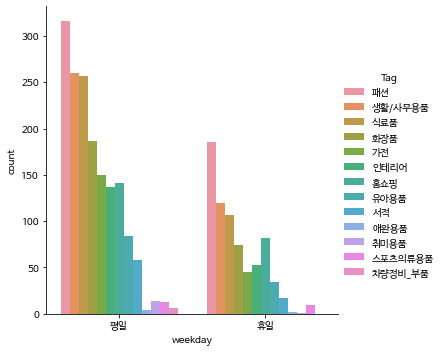

In [8]:
sns.catplot('weekday',kind='count',hue='Tag',data=datas) # 평일/공휴일에 따른 구매목록 개수

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


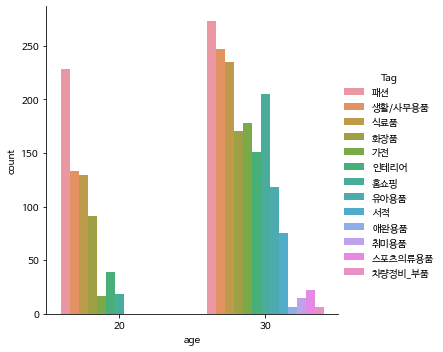

In [9]:
sns.catplot('age',kind='count',hue='Tag',data=datas)  # 나이에 따른 구매목록 개수
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


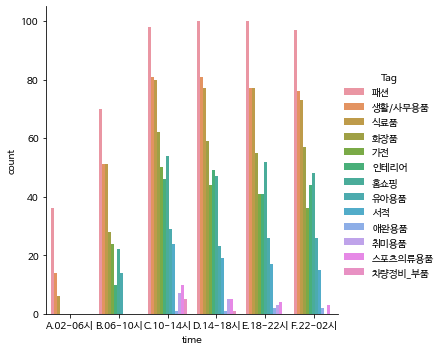

In [10]:
sns.catplot('time',kind='count',hue='Tag',data=datas)  # 시간에 따른 구매목록 개수

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


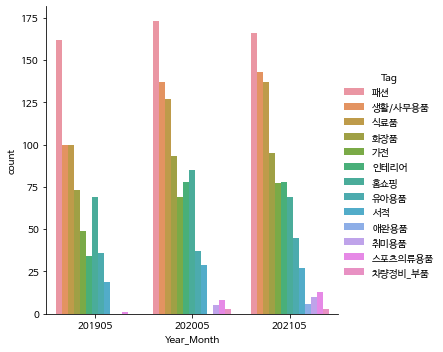

In [11]:
sns.catplot('Year_Month',kind='count',hue='Tag',data=datas)

* 낮은 비율을 찾이하는 차량장비, 취미용품, 애완용품,스포츠 의류 Drop

In [12]:
datas['Tag'].unique()[:9]

array(['패션', '생활/사무용품', '식료품', '화장품', '가전', '인테리어', '홈쇼핑', '유아용품', '서적'],
      dtype=object)

<AxesSubplot:xlabel='time', ylabel='sum'>

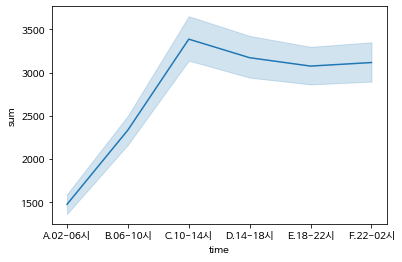

In [13]:
sns.lineplot(x='time',y='sum',data=datas)    # 02~06시에는 건수가 적음으로 드랍

In [14]:
aa=datas['time'].unique()[0]
datas= datas[datas['time']!=datas['time'].unique()[0]]

In [50]:
YM = np.sort(datas['Year_Month'].unique())
tags = datas['Tag'].unique()[:9]
YM,tags

(array([201905, 202005, 202105]),
 array(['패션', '생활/사무용품', '식료품', '화장품', '가전', '인테리어', '홈쇼핑', '유아용품', '서적'],
       dtype=object))

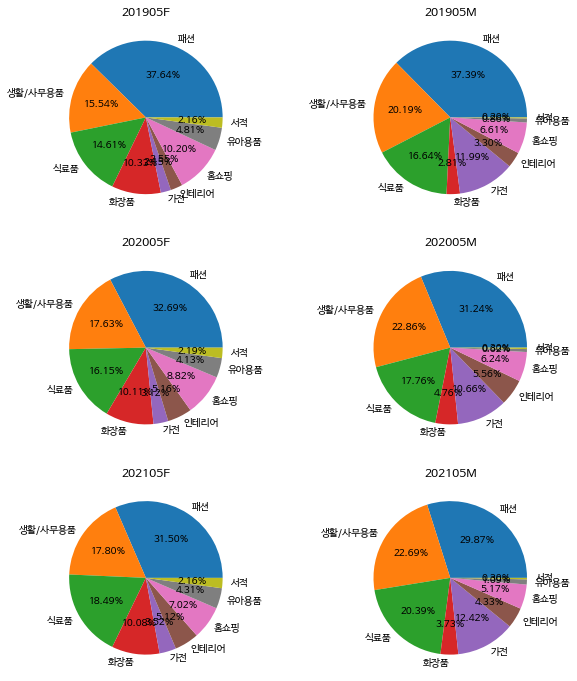

In [44]:
def prod(YM,tag,sex):
    total=datas.loc[(datas['Year_Month'] == YM) & (datas['sex']==sex)]
    return (total.loc[total['Tag']==tag]['sum'].sum() / total['sum'].sum())*100

def Pieplot(ym,cnt,tags,data,sex):
    plt.subplot(3,2,cnt)
    plt.title(str(ym)+sex)
    
    plt.pie(data,labels=tags,
            autopct='%1.2f%%')

Female = []
Man = []
cnt=0

plt.figure(figsize=(10,12))
plt.tight_layout()

for i in YM:
    cnt+=1
    for j in tags:
        Female.append(prod(i,j,'F'))
        Man.append(prod(i,j,'M'))
    Pieplot(i,cnt,tags,Female,'F')
    cnt+=1    
    Pieplot(i,cnt,tags,Man,'M')
    Female=[]
    Man=[]

plt.show()

In [48]:
 aa=datas.groupby([datas['weekday'],datas['time'],datas['age'],datas['sex']])[['Tag']].value_counts() # 평/주말과 시간,나이,성별에 대한 종목들의 카운트
aa = pd.DataFrame(aa)
aa = aa.unstack()
aa.fillna(0,inplace=True)
aa

0                                               \
Tag                         가전 생활/사무용품    서적 스포츠의류용품   식료품 애완용품  유아용품  인테리어   
weekday time     age sex                                                      
평일      B.06-10시 20  F     1.0     9.0   0.0     0.0   9.0  0.0   0.0   0.0   
                     M     0.0     1.0   0.0     0.0   1.0  0.0   0.0   0.0   
                 30  F     9.0    15.0   0.0     0.0  15.0  0.0  12.0   8.0   
                     M    13.0    15.0   0.0     0.0  15.0  0.0   0.0   1.0   
        C.10-14시 20  F     4.0    15.0   0.0     0.0  15.0  0.0   0.0   7.0   
                     M     5.0    12.0   0.0     0.0  12.0  0.0   0.0   0.0   
                 30  F    15.0    15.0  15.0     3.0  15.0  1.0  15.0  15.0   
                     M    15.0    15.0   5.0     4.0  15.0  0.0   7.0  14.0   
        D.14-18시 20  F     2.0    15.0   0.0     0.0  15.0  0.0   0.0   6.0   
                     M     1.0     8.0   0.0     0.0   9.0  0.0   0.0   0.0   
                 30  F    15.0    15.0  14.0     1.0  15.0  1.0  15.0  15.0   
                     M    15.0    15.0   0.0     3.0  15.0  0.0   1.0  14.0   
        E.18-22시 20  F     1.0    15.0   0.0     0.0  15.0  0.0   0.0   5.0   
                     M     1.0     5.0   0.0     0.0   6.0  0.0   0.0   0.0   
                 30  F    12.0    15.0  13.0     1.0  15.0  1.0  15.0  13.0   
                     M    15.0    15.0   0.0     0.0  15.0  0.0   2.0   9.0   
        F.22-02시 20  F     0.0    15.0   0.0     0.0  15.0  0.0   0.0   7.0   
                     M     1.0     5.0   0.0     0.0   4.0  0.0   0.0   0.0   
                 30  F    10.0    15.0  11.0     1.0  15.0  1.0  15.0  15.0   
                     M    15.0    15.0   0.0     0.0  15.0  0.0   2.0   8.0   
휴일      B.06-10시 20  F     0.0     0.0   0.0     0.0   0.0  0.0   0.0   0.0   
                 30  F     0.0     7.0   0.0     0.0   7.0  0.0   2.0   1.0   
                     M     1.0     4.0   0.0     0.0   4.0  0.0   0.0   0.0   
        C.10-14시 20  F     0.0     4.0   0.0     0.0   4.0  0.0   0.0   2.0   
                     M     0.0     2.0   0.0     0.0   2.0  0.0   0.0   0.0   
                 30  F     4.0    10.0   4.0     1.0  10.0  0.0   7.0   4.0   
                     M     7.0     8.0   0.0     2.0   7.0  0.0   0.0   4.0   
        D.14-18시 20  F     0.0     6.0   0.0     0.0   4.0  0.0   0.0   4.0   
                     M     0.0     4.0   0.0     0.0   3.0  0.0   0.0   0.0   
                 30  F     4.0    10.0   5.0     1.0   9.0  0.0   7.0   6.0   
                     M     7.0     8.0   0.0     0.0   7.0  0.0   0.0   4.0   
        E.18-22시 20  F     0.0     6.0   0.0     0.0   6.0  0.0   0.0   4.0   
                     M     1.0     3.0   0.0     0.0   2.0  0.0   0.0   0.0   
                 30  F     4.0    10.0   4.0     2.0  11.0  1.0   7.0   6.0   
                     M     7.0     8.0   0.0     1.0   7.0  0.0   2.0   4.0   
        F.22-02시 20  F     0.0     6.0   0.0     0.0   6.0  0.0   0.0   4.0   
                     M     0.0     2.0   0.0     0.0   1.0  0.0   0.0   0.0   
                 30  F     4.0    10.0   4.0     2.0  10.0  1.0   7.0   6.0   
                     M     6.0     8.0   0.0     0.0   7.0  0.0   2.0   4.0   

                                                         
Tag                      차량정비_부품 취미용품    패션   홈쇼핑   화장품  
weekday time     age sex                                 
평일      B.06-10시 20  F       0.0  0.0  15.0   0.0   8.0  
                     M       0.0  0.0   5.0   0.0   0.0  
                 30  F       0.0  0.0  15.0  15.0  15.0  
                     M       0.0  0.0  15.0   0.0   0.0  
        C.10-14시 20  F       0.0  0.0  15.0   5.0  15.0  
                     M       0.0  0.0  15.0   0.0   0.0  
                 30  F       0.0  3.0  15.0  15.0  15.0  
                     M       5.0  4.0  15.0  15.0  14.0  
        D.14-18시 20  F       0.0  0.0  15.0   1.0  15.0  
              

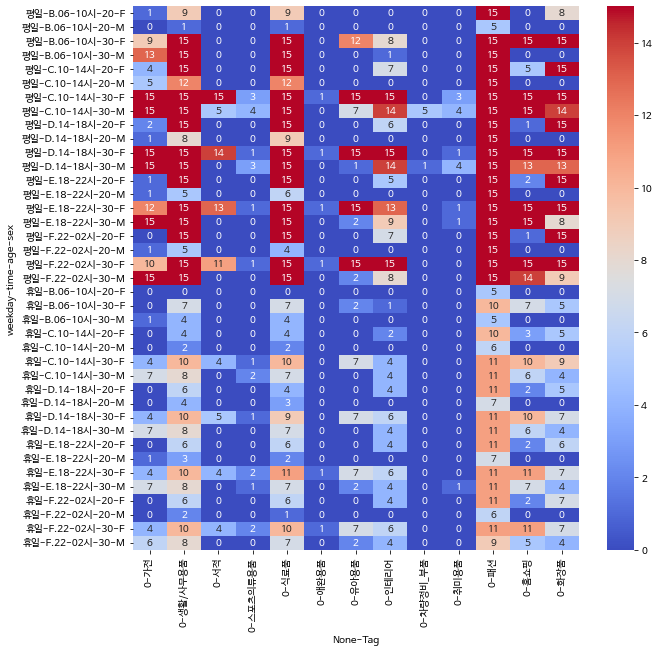

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(aa, cmap='coolwarm', annot=True)
plt.show()